In [3]:
import pandas as pd
import geopandas as gpd
import fiona
import geopandas.geoseries  
import folium
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
from shapely import wkt

In [4]:
# importing single family zoning data
sfzones=gpd.read_file('data/Zoning.shp')

In [5]:
sfzones.head(10)

,OBJECTID,ZONE_CMPLT,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,geometry
0,1,(F)CM-1-CUGU,CM,INDUSTRIAL,0.001376,1.135955e-07,"POLYGON ((-118.38794 34.22863, -118.38835 34.2..."
1,2,(F)CM-1-CUGU,CM,INDUSTRIAL,0.001376,1.136063e-07,"POLYGON ((-118.38794 34.22959, -118.38836 34.2..."
2,3,(F)CM-1-CUGU,CM,INDUSTRIAL,0.001102,5.680651e-08,"POLYGON ((-118.38795 34.23014, -118.38836 34.2..."
3,4,(F)CM-1-CUGU,CM,INDUSTRIAL,0.001102,5.680455e-08,"POLYGON ((-118.38795 34.23041, -118.38836 34.2..."
4,5,(F)CM-1-CUGU,CM,INDUSTRIAL,0.001376,1.136150e-07,"POLYGON ((-118.38795 34.23140, -118.38837 34.2..."
5,6,(F)CM-1-CUGU,CM,INDUSTRIAL,0.001376,1.136142e-07,"POLYGON ((-118.38796 34.23195, -118.38837 34.2..."
6,7,(F)CM-1-CUGU,CM,INDUSTRIAL,0.001582,1.360463e-07,"POLYGON ((-118.38831 34.23236, -118.38837 34.2..."
7,8,(F)CM-1-HPOZ,CM,INDUSTRIAL,0.001050,5.430494e-08,"POLYGON ((-118.27491 34.04032, -118.27498 34.0..."
8,9,(F)CM-1-HPOZ,CM,INDUSTRIAL,0.002202,2.717913e-07,"POLYGON ((-118.27468 34.04068, -118.27475 34.0..."
9,10,(F)CM-1-O-HPOZ,CM,INDUSTRIAL,0.001287,1.049222e-07,"POLYGON ((-118.27436 34.04023, -118.27439 34.0..."


In [6]:
sfzones.ZONE_SMRY.unique().tolist()

['INDUSTRIAL',
 'RESIDENTIAL',
 'AGRICULTURE',
 'COMMERCIAL',
 'PARKING',
 'PUBLIC FACILITY',
 'OPEN SPACE',
 None]

In [7]:
sfzones=sfzones.loc[sfzones['ZONE_SMRY'].isin(['RESIDENTIAL', 'AGRICULTURE'])].copy()
sfzones.sample(20)

,OBJECTID,ZONE_CMPLT,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,geometry
42235,42236,RD1.5-1,RD1.5,RESIDENTIAL,0.004218,8.244102e-07,"POLYGON ((-118.22090 34.06803, -118.22090 34.0..."
21835,21836,R1V2,R1V2,RESIDENTIAL,0.004188,5.950570e-07,"POLYGON ((-118.43346 34.02428, -118.43346 34.0..."
19676,19677,R1-1,R1,RESIDENTIAL,0.004755,8.504119e-07,"POLYGON ((-118.24086 33.94604, -118.24092 33.9..."
27454,27455,R1-1,R1,RESIDENTIAL,0.004604,1.146511e-06,"POLYGON ((-118.48162 34.20308, -118.48162 34.2..."
48156,48157,RE9-1-HCR,RE9,RESIDENTIAL,0.004029,7.558447e-07,"POLYGON ((-118.36610 34.10040, -118.36608 34.1..."
33676,33677,R2-1,R2,RESIDENTIAL,0.004971,6.525200e-07,"POLYGON ((-118.32891 34.00675, -118.32902 34.0..."
41371,41372,RA-1-K,RA,AGRICULTURE,0.006685,2.814985e-06,"POLYGON ((-118.36521 34.27465, -118.36521 34.2..."
23553,23554,R1-1,R1,RESIDENTIAL,0.009828,2.323667e-06,"POLYGON ((-118.20893 34.10287, -118.20892 34.1..."
29591,29592,R1-1,R1,RESIDENTIAL,0.004264,1.136787e-06,"POLYGON ((-118.46326 34.26650, -118.46327 34.2..."
3380,3381,[Q]RD1.5-1,RD1.5,RESIDENTIAL,0.002333,2.869437e-07,"POLYGON ((-118.41839 34.17200, -118.41831 34.1..."


In [8]:
sfzones.ZONE_CLASS.unique().tolist()

['R2',
 'RE11',
 'A1',
 'A2',
 'RAS4',
 'R1',
 'R3',
 'R3P',
 'R4',
 'R4P',
 'R5',
 'RD1.5',
 'RD2',
 'RD3',
 'RD6',
 'RD4',
 'RD5',
 'RS',
 'RZ3',
 'RZ5',
 'RA',
 'RE20',
 'RU',
 'RE40',
 'RE9',
 'RAS3',
 'R2P',
 'R1P',
 'RMP',
 'RE',
 'RZ4',
 'A2(PV)',
 'R1V2',
 'R1R3',
 'R1H1',
 'R1V1',
 'R1V3',
 'R3(PV)',
 'R4(PV)',
 'R5P',
 'RAP',
 'RE15',
 'RSP',
 'RW1',
 'RW2',
 'RZ2.5',
 'A1(UV)',
 'R3(UV)',
 'RAS3(UV)']

In [9]:
sfzones_trimmed = sfzones.loc[sfzones['ZONE_CLASS'].isin(['R2','RE11','RE20','RE40','RE15','RE9','RS','R1','R1V','R1F','R1R','R1H','R1P','RU','R2P','RZ4','R1V2','R1R3','R1H1','R1V1','R1V3','RW1','RW2','RZ2.5','RA'])].copy()

In [10]:
sfzones_trimmed.sample(10)

,OBJECTID,ZONE_CMPLT,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,geometry
52455,52456,R1-1-RIO,R1,RESIDENTIAL,0.003122,4.404644e-07,"POLYGON ((-118.27068 34.13305, -118.27063 34.1..."
40171,40172,RA-1VLD,RA,AGRICULTURE,0.000311,4.088209e-09,"POLYGON ((-118.50127 34.16941, -118.50127 34.1..."
25089,25090,R1-1-RIO,R1,RESIDENTIAL,0.004156,7.475139e-07,"POLYGON ((-118.41441 34.15243, -118.41441 34.1..."
49329,49330,RS-1,RS,RESIDENTIAL,0.002396,2.856628e-07,"POLYGON ((-118.45252 34.24975, -118.45252 34.2..."
19447,19448,R1-1,R1,RESIDENTIAL,0.005028,1.390479e-06,"POLYGON ((-118.28921 33.93470, -118.28921 33.9..."
30517,30518,R1-1-O,R1,RESIDENTIAL,0.004637,7.298017e-07,"POLYGON ((-118.41605 34.04859, -118.41619 34.0..."
51788,51789,R1V3-RG,R1V3,RESIDENTIAL,0.004704,8.328360e-07,"POLYGON ((-118.33959 34.06909, -118.33959 34.0..."
23255,23256,R1-1,R1,RESIDENTIAL,0.003010,4.726160e-07,"POLYGON ((-118.21437 34.09069, -118.21446 34.0..."
25680,25681,R1-1,R1,RESIDENTIAL,0.003000,4.441240e-07,"POLYGON ((-118.45807 34.16549, -118.45811 34.1..."
26867,26868,R1-1,R1,RESIDENTIAL,0.006318,1.071072e-06,"POLYGON ((-118.41554 34.19466, -118.41554 34.1..."


In [11]:
sfzones_trimmed2 = sfzones_trimmed[['ZONE_CLASS','ZONE_SMRY','SHAPE_Leng','SHAPE_Area','geometry']].copy()
sfzones_trimmed2.sample(10)

,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,geometry
35741,RS,RESIDENTIAL,0.006671,1.149628e-06,"POLYGON ((-118.50228 34.28314, -118.50228 34.2..."
24391,R1,RESIDENTIAL,0.002751,3.648792e-07,"POLYGON ((-118.21581 34.12956, -118.21581 34.1..."
29658,RE9,RESIDENTIAL,0.004976,1.520764e-06,"POLYGON ((-118.51908 34.26982, -118.51908 34.2..."
30356,R1R3,RESIDENTIAL,0.004260,8.149209e-07,"POLYGON ((-118.30648 34.02737, -118.30649 34.0..."
40331,RA,AGRICULTURE,0.002678,3.378141e-07,"POLYGON ((-118.58520 34.20461, -118.58519 34.2..."
23853,R1,RESIDENTIAL,0.001532,8.555707e-08,"POLYGON ((-118.18380 34.11362, -118.18390 34.1..."
56587,R1,RESIDENTIAL,0.008159,1.486389e-06,"POLYGON ((-118.39606 33.96805, -118.39611 33.9..."
33463,R2,RESIDENTIAL,0.006974,1.016298e-06,"POLYGON ((-118.26446 33.99582, -118.26459 33.9..."
23661,R1,RESIDENTIAL,0.005064,9.029866e-07,"POLYGON ((-118.29242 34.10549, -118.29285 34.1..."
30376,R1,RESIDENTIAL,0.005366,8.569123e-07,"POLYGON ((-118.31741 34.03001, -118.31757 34.0..."


In [12]:
sfzones_trimmed2 = sfzones_trimmed2.to_crs(epsg=3857)

In [13]:
sfzones_trimmed2['parcelarea_km2'] = sfzones_trimmed2.area / 1000**2
sfzones_trimmed2.sample(5)

,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,geometry,parcelarea_km2
52787,RS,RESIDENTIAL,0.000456,7.594753e-09,"POLYGON ((-13182694.982 4070095.407, -13182689...",0.000114
28973,R1,RESIDENTIAL,0.003741,6.626288e-07,"POLYGON ((-13179049.569 4060065.561, -13179049...",0.009932
21914,R2,RESIDENTIAL,0.005141,1.415671e-06,"POLYGON ((-13174309.741 4032590.682, -13174321...",0.021168
33238,R2,RESIDENTIAL,0.004325,6.063981e-07,"POLYGON ((-13186414.990 4027276.201, -13186424...",0.009063
46792,RE11,RESIDENTIAL,0.007639,1.952628e-06,"POLYGON ((-13186939.168 4071457.248, -13186938...",0.029297


In [15]:
highopp=gpd.read_file('data/HighOpp.zip')

<AxesSubplot: >

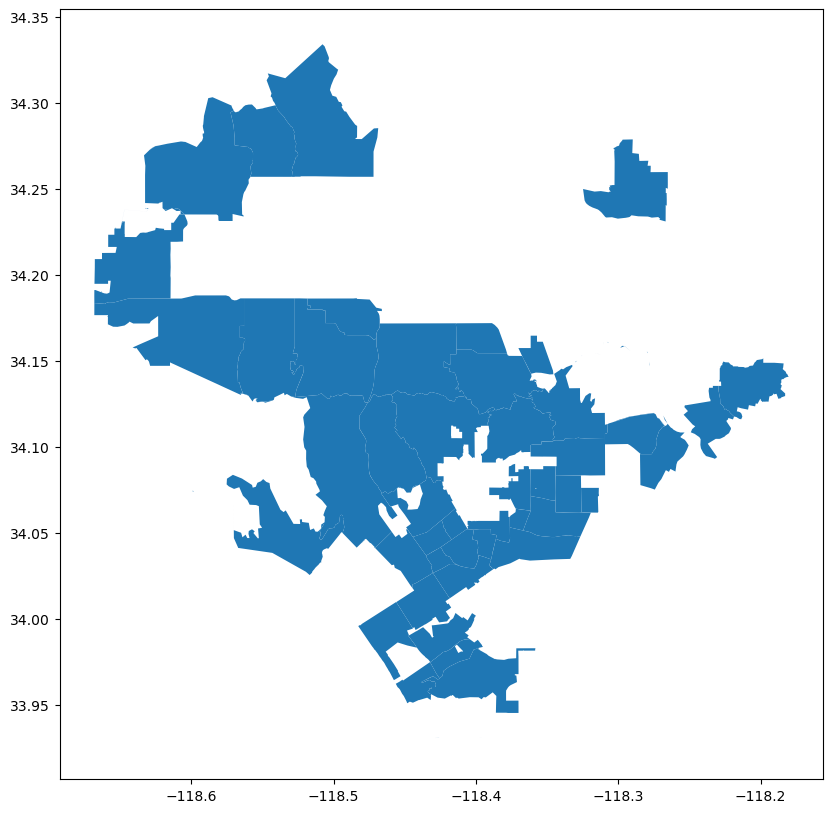

In [16]:
highopp.plot(figsize=(10,10))

In [18]:
highopp = highopp.to_crs(epsg=3857)

In [19]:
highopp.sample(10)

,index,Neighborho,Unnamed_ 0,OBJECTID,fips,Opportunit,oppcat,color,geometry
14,14,Cheviot Hills,874.166667,1.0,6.037269e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13180217.802 4033006.969, -13180329..."
10,10,Hancock Park,528.125000,1.0,6.037203e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13174006.064 4039585.119, -13174006..."
36,36,Glassell Park,460.823529,1.0,6.037201e+09,2.0,High Resource,#aed0d9ff,"POLYGON ((-13162640.010 4042144.606, -13162684..."
20,20,Brentwood,825.111111,1.0,6.037323e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13192385.134 4035382.085, -13192391..."
17,17,Venice,960.687500,1.0,6.037381e+09,1.0,Highest Resource,#93b9c6ff,"MULTIPOLYGON (((-13187122.535 4026000.153, -13..."
46,46,Encino,404.533333,1.0,6.037203e+09,2.0,High Resource,#aed0d9ff,"POLYGON ((-13189247.944 4046272.028, -13189685..."
7,7,Playa del Rey,963.333333,1.0,6.037362e+09,1.0,Highest Resource,#93b9c6ff,"MULTIPOLYGON (((-13185409.410 4022357.679, -13..."
21,21,West Los Angeles,861.428571,1.0,6.037267e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13182970.973 4034432.103, -13183089..."
37,37,Chatsworth Reservoir,92.400000,1.0,6.037113e+09,2.0,High Resource,#aed0d9ff,"MULTIPOLYGON (((-13205845.871 4059069.423, -13..."
40,40,Toluca Lake,277.500000,1.0,6.037134e+09,2.0,High Resource,#aed0d9ff,"POLYGON ((-13176139.601 4048410.470, -13176332..."


In [20]:
#getting a column to calculate the area of each tier category
highopp['nhoodarea_km2'] = highopp.area / 1000**2
highopp.head(5)

,index,Neighborho,Unnamed_ 0,OBJECTID,fips,Opportunit,oppcat,color,geometry,nhoodarea_km2
0,0,Sherman Oaks,406.000000,1.0,6.037183e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13188700.793 4045734.128, -13188480...",34.664753
1,1,Mid-Wilshire,625.700000,1.0,6.037215e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13175085.863 4035277.290, -13175419...",10.540875
2,2,Pacific Palisades,779.294118,1.0,6.037348e+09,1.0,Highest Resource,#93b9c6ff,"MULTIPOLYGON (((-13198829.243 4034360.247, -13...",26.788230
3,3,Hollywood Hills West,634.000000,1.0,6.037337e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13179075.950 4041035.183, -13179328...",18.424267
4,4,Palms,904.272727,1.0,6.037310e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13183600.468 4032403.866, -13183565...",7.316844


In [21]:
# reducing by 18% to account for road areas within neighborhood areas 
highopp['nhoodarea_km2_adjusted'] = highopp['nhoodarea_km2'] * (1-0.18)
highopp.head(5)

,index,Neighborho,Unnamed_ 0,OBJECTID,fips,Opportunit,oppcat,color,geometry,nhoodarea_km2,nhoodarea_km2_adjusted
0,0,Sherman Oaks,406.000000,1.0,6.037183e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13188700.793 4045734.128, -13188480...",34.664753,28.425097
1,1,Mid-Wilshire,625.700000,1.0,6.037215e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13175085.863 4035277.290, -13175419...",10.540875,8.643517
2,2,Pacific Palisades,779.294118,1.0,6.037348e+09,1.0,Highest Resource,#93b9c6ff,"MULTIPOLYGON (((-13198829.243 4034360.247, -13...",26.788230,21.966348
3,3,Hollywood Hills West,634.000000,1.0,6.037337e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13179075.950 4041035.183, -13179328...",18.424267,15.107899
4,4,Palms,904.272727,1.0,6.037310e+09,1.0,Highest Resource,#93b9c6ff,"POLYGON ((-13183600.468 4032403.866, -13183565...",7.316844,5.999812


In [22]:
highopp_sfzones = highopp.overlay(sfzones_trimmed2, how='intersection')

In [23]:
highopp_sfzones.sample(10)

,index,Neighborho,Unnamed_ 0,OBJECTID,fips,Opportunit,oppcat,color,nhoodarea_km2,nhoodarea_km2_adjusted,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,parcelarea_km2,geometry
1143,2,Pacific Palisades,779.294118,1.0,6.037348e+09,1.0,Highest Resource,#93b9c6ff,26.788230,21.966348,RE11,RESIDENTIAL,0.004771,9.815918e-07,0.014681,"POLYGON ((-13191561.349 4035895.623, -13191558..."
5949,29,Chatsworth,144.090909,1.0,6.037150e+09,2.0,High Resource,#aed0d9ff,50.307999,41.252559,RA,AGRICULTURE,0.013631,7.133585e-06,0.106938,"POLYGON ((-13204636.114 4061617.056, -13204636..."
8090,35,Woodland Hills,399.076923,1.0,6.037213e+09,2.0,High Resource,#aed0d9ff,51.522743,42.248649,R1,RESIDENTIAL,0.001604,1.435217e-07,0.002149,"POLYGON ((-13201200.379 4048562.457, -13201204..."
3867,17,Venice,960.687500,1.0,6.037381e+09,1.0,Highest Resource,#93b9c6ff,11.309903,9.274121,R1,RESIDENTIAL,0.001932,1.719502e-07,0.002570,"POLYGON ((-13186163.486 4026963.626, -13186172..."
1083,2,Pacific Palisades,779.294118,1.0,6.037348e+09,1.0,Highest Resource,#93b9c6ff,26.788230,21.966348,R1,RESIDENTIAL,0.007636,1.664707e-06,0.024905,"POLYGON ((-13196703.856 4038939.649, -13196694..."
8012,34,Granada Hills,107.923077,1.0,6.037140e+09,2.0,High Resource,#aed0d9ff,48.670472,39.909787,R1,RESIDENTIAL,0.002963,4.820732e-07,0.007229,"POLYGON ((-13193627.268 4064624.840, -13193627..."
2087,8,Porter Ranch,131.222222,1.0,6.037155e+09,1.0,Highest Resource,#93b9c6ff,21.228111,17.407051,RE11,RESIDENTIAL,0.007873,1.445735e-06,0.021682,"POLYGON ((-13197764.846 4066242.609, -13197803..."
8504,35,Woodland Hills,399.076923,1.0,6.037213e+09,2.0,High Resource,#aed0d9ff,51.522743,42.248649,RS,RESIDENTIAL,0.020409,8.864098e-06,0.132766,"POLYGON ((-13200017.404 4052011.008, -13200017..."
3593,16,Beverly Crest,700.545455,1.0,6.037298e+09,1.0,Highest Resource,#93b9c6ff,30.499791,25.009828,RE15,RESIDENTIAL,0.003829,7.450005e-07,0.011150,"POLYGON ((-13184289.394 4043361.544, -13184289..."
5924,29,Chatsworth,144.090909,1.0,6.037150e+09,2.0,High Resource,#aed0d9ff,50.307999,41.252559,R1,RESIDENTIAL,0.006711,1.810659e-06,0.027147,"POLYGON ((-13203554.474 4063126.459, -13203563..."


In [24]:
highopp_sfzones = highopp_sfzones.to_crs(epsg=3857)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

highopp.plot(column='Neighborho',
                 alpha=0.7,
                 legend=True, 
                 ax=ax)

highopp_sfzones.plot(
                 column='ZONE_SMRY',
                 legend=True, 
                 ax=ax)
ax.axis('off')

ax.set_title('Single Family Zones')

ctx.add_basemap(ax, crs=3857, source=ctx.providers.CartoDB.Positron)

In [ ]:
#droppping extra columns
highopp_sfzones= highopp_sfzones[['index','Neighborho','oppcat','nhoodarea_km2','nhoodarea_km2_adjusted','ZONE_CLASS','ZONE_SMRY','SHAPE_Leng','SHAPE_Area','parcelarea_km2','geometry']]
highopp_sfzones.sample(10)

In [ ]:
highopp_sfzones['Pct_Covered'] = highopp_sfzones['parcelarea_km2'] / highopp_sfzones['nhoodarea_km2_adjusted'] * 100
highopp_sfzones.sample(10)

In [ ]:
highopp_neighborhoods = highopp_sfzones.groupby(['Neighborho'])[["Pct_Covered"]].sum()

In [ ]:
highopp_neighborhoods = highopp_neighborhoods.sort_values(by='Pct_Covered',ascending=False)
highopp_neighborhoods.head(12)

In [ ]:
highopp_neighborhoods.tail(10)